## 例題

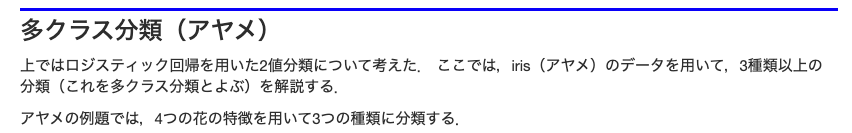

In [1]:
from IPython.display import Image
Image('iris.png')

## 解答

In [2]:
import plotly.express as px

iris = px.data.iris()
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_id
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1


In [3]:
X = iris[["sepal_length", "sepal_width", "petal_length", "petal_width"]]
y = iris["species_id"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: species_id, dtype: int64

In [4]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X, y)

LogisticRegression()

In [5]:
logreg.predict([[3, 5, 4, 2]])

/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names



array([1])

### 予測と実際の誤差を検証

In [6]:
y_pred = logreg.predict(X)

In [7]:
from sklearn import metrics

print(metrics.accuracy_score(y, y_pred))

0.9733333333333334


### 可視化

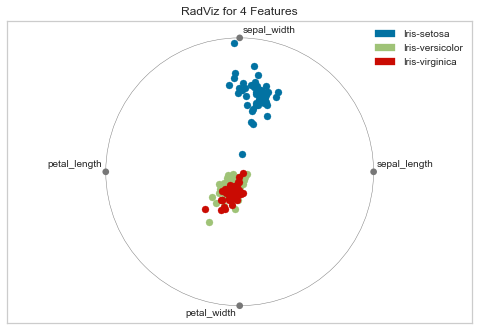

In [8]:
from yellowbrick.features import RadViz

visualizer = RadViz(
    classes=["Iris-setosa", "Iris-versicolor", "Iris-virginica"], size=(600, 400)
)

visualizer.fit(X, y)
visualizer.transform(X)
visualizer.show();

/opt/anaconda3/lib/python3.7/site-packages/yellowbrick/contrib/classifier/boundaries.py:440: MatplotlibDeprecationWarning:

shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.



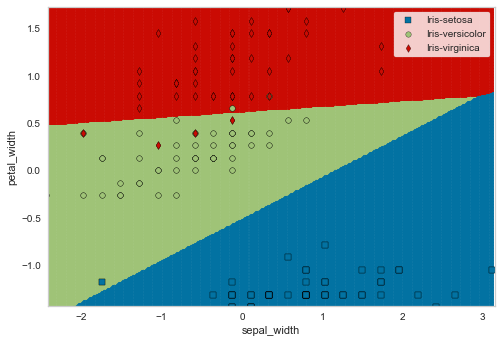

In [9]:
from sklearn.preprocessing import StandardScaler
from yellowbrick.contrib.classifier import DecisionViz

X = iris[["sepal_width", "petal_width"]]
X = StandardScaler().fit_transform(X)

viz = DecisionViz(
    logreg,
    features=["sepal_width", "petal_width"],
    classes=["Iris-setosa", "Iris-versicolor", "Iris-virginica"],
)
viz.fit(X, y)
viz.draw(X, y)
viz.show();

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.



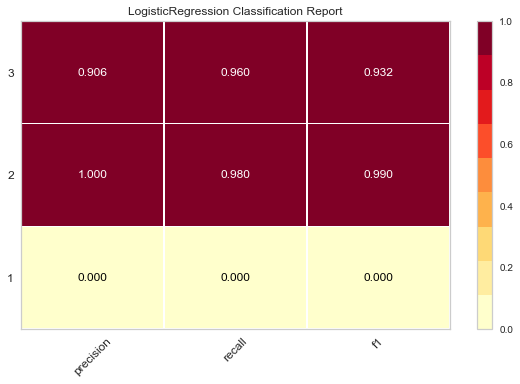

In [10]:
from yellowbrick.classifier import ClassificationReport

visualizer = ClassificationReport(logreg)

visualizer.fit(X, y)
visualizer.score(X, y)
visualizer.show();

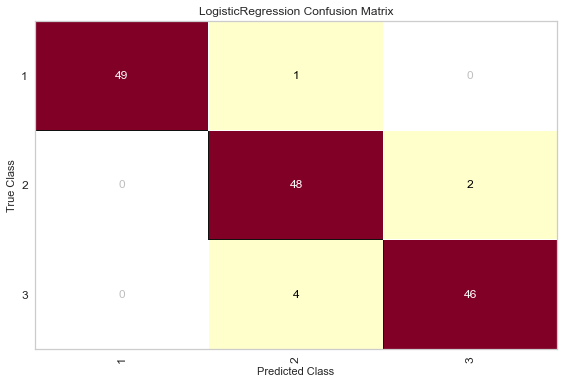

In [11]:
from yellowbrick.classifier import ConfusionMatrix

cm = ConfusionMatrix(logreg)

cm.fit(X, y)
cm.score(X, y)
cm.show();

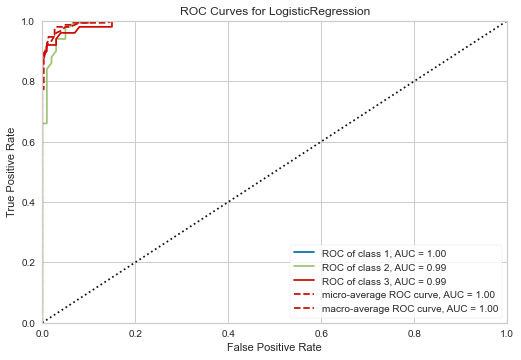

In [12]:
from yellowbrick.classifier import ROCAUC

visualizer = ROCAUC(logreg, size=(600, 400))

visualizer.fit(X, y)
visualizer.score(X, y)
visualizer.show();

### predict_proba について調査

In [13]:
logreg.fit(X, y)
y_pred_prob = logreg.predict_proba(X)
y_pred_prob[:8]

array([[9.80632623e-01, 1.93625936e-02, 4.78290874e-06],
       [9.12056894e-01, 8.79144862e-02, 2.86203475e-05],
       [9.51351061e-01, 4.86347616e-02, 1.41777362e-05],
       [9.34388001e-01, 6.55917927e-02, 2.02062993e-05],
       [9.85821164e-01, 1.41755222e-02, 3.31352653e-06],
       [9.87535336e-01, 1.24572472e-02, 7.41672266e-06],
       [9.60725738e-01, 3.92564959e-02, 1.77665184e-05],
       [9.73596245e-01, 2.63968648e-02, 6.89061666e-06]])

In [14]:
import numpy as np
np.argmin(y_pred_prob, axis=0)

array([114,  32,  32])

In [15]:
y_pred_prob[114]

array([9.92393637e-06, 1.49694307e-02, 9.85020645e-01])

In [16]:
9.92393637e-06 + 1.49694307e-02 + 9.85020645e-01

0.99999999963637